In [1]:
%cd /teamspace/studios/this_studio/2024/07/store_demand_forecasting/code/

/teamspace/studios/this_studio/2024/07/store_demand_forecasting/code


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import config as config
import utils as utils
import data_processing as dp
import seaborn as sns
import models as models
import pickle
import mlflow
import matplotlib.pyplot as plt
mlflow.set_tracking_uri("http://127.0.0.1:8000")

In [3]:
train_df , test_df = dp.load_data()

In [4]:
dp.preprocess_data(train_df)

In [5]:
train, test = dp.get_train_test_split(train_df)

In [6]:
train = train[train['unique_id']=='1_13']
test = test[test['unique_id']=='1_13']

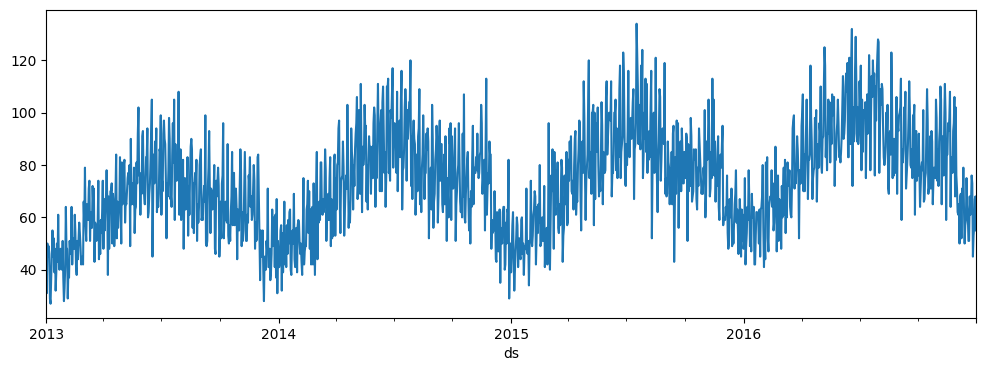

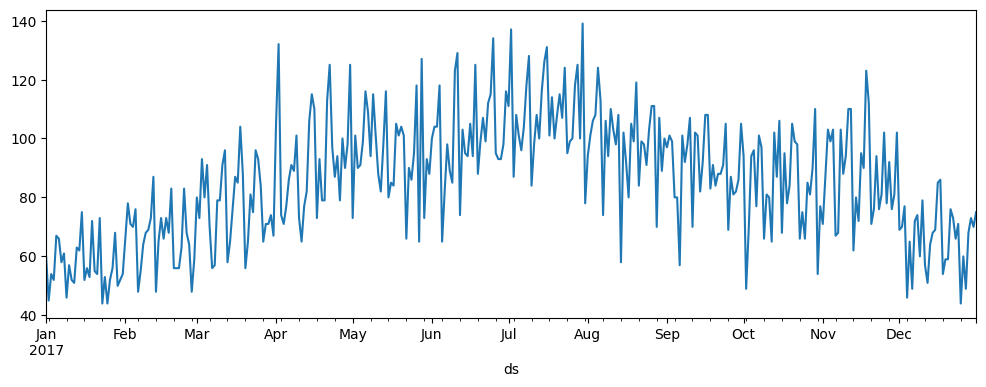

In [7]:
utils.plot_ts(train,'1_13')
utils.plot_ts(test,'1_13')

In [8]:
def run_experiment(desc,model_name,train_data,test_data,**params):
    mlflow.set_experiment(desc)
    with mlflow.start_run():
        model = models.Forecasting_Model(model_name=model_name,train=train,test=test,**params)
        model.fit()
        pred = model.forecast(horizon=365)
        wmape = model.wmape()
        model.plot_forecast()
        with open('model.pkl','wb') as file:
            pickle.dump(model,file)
        mlflow.log_metric("WMAPE", wmape)
        mlflow.log_params(params)
        mlflow.log_param("Model_Name",model_name)
        mlflow.log_param("Description",desc)
        mlflow.log_artifact('forecast_image.png')
        mlflow.log_artifact('model.pkl')

In [9]:
# run_experiment('Univariate No Major Change','LightGBM',train,test)

In [10]:
# run_experiment('Univariate No Major Change','NBEATS',train,test,input_size=730,h=365)

In [11]:
# run_experiment('Univariate No Major Change','NHITS',train,test,input_size=730,h=365)

In [12]:
# run_experiment('Univariate No Major Change','AutoETS',train,test)

In [13]:
# run_experiment('Univariate No Major Change','Prophet',train,test)

: 

In [14]:
run_experiment('Univariate No Major Change','TFT',train,test,input_size=730,h=365)

Seed set to 1


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | MAE                      | 0      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 512    | train
4 | static_encoder          | StaticCovariateEncoder   | 331 K  | train
5 | temporal_encoder        | TemporalCovariateEncoder | 613 K  | train
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 256 K  | train
7 | output_adapter     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]